In [1]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
summarize)

In [309]:
from ISLP import confusion_table
from ISLP.models import contrast
from sklearn.discriminant_analysis import \
(LinearDiscriminantAnalysis as LDA,
QuadraticDiscriminantAnalysis as QDA)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

In [343]:
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
Smarket = load_data('Smarket')
Smarket[0:10]

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up
5,2001,0.213,0.614,-0.623,1.032,0.959,1.3491,1.392,Up
6,2001,1.392,0.213,0.614,-0.623,1.032,1.4450,-0.403,Down
7,2001,-0.403,1.392,0.213,0.614,-0.623,1.4078,0.027,Up
8,2001,0.027,-0.403,1.392,0.213,0.614,1.1640,1.303,Up
9,2001,1.303,0.027,-0.403,1.392,0.213,1.2326,0.287,Up


In [11]:
Smarket.columns

Index(['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Today',
       'Direction'],
      dtype='object')

In [ ]:
##############exercise

In [131]:
#13.
Weekly = load_data('Weekly')
Weekly.columns
#contains 1, 089 weekly returns for 21 years, from the beginning of 1990 to the end of 2010.

Index(['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Today',
       'Direction'],
      dtype='object')

In [265]:
#a
Weekly[0:10]

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up
5,1990,1.178,0.712,3.514,-2.576,-0.270,0.154444,-1.372,Down
6,1990,-1.372,1.178,0.712,3.514,-2.576,0.151722,0.807,Up
7,1990,0.807,-1.372,1.178,0.712,3.514,0.132310,0.041,Up
8,1990,0.041,0.807,-1.372,1.178,0.712,0.143972,1.253,Up
9,1990,1.253,0.041,0.807,-1.372,1.178,0.133635,-2.678,Down


<Axes: >

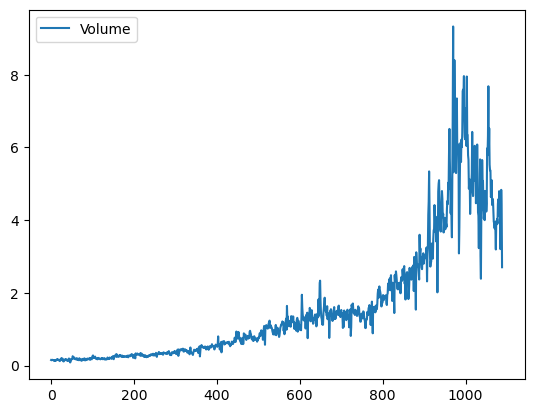

In [266]:
Weekly.plot(y='Volume')

In [304]:
#b logistic regression
allvars = Weekly.columns.drop(['Today', 'Direction', 'Year'])
design = MS(allvars)
X = design.fit_transform(Weekly)
y = Weekly.Direction == 'Up'
glm = sm.GLM(y, X, family=sm.families.Binomial())
results = glm.fit()
summarize(results)
# the Lag2 seems to be statistically signifcant

,coef,std err,z,P>|z|
intercept,0.2669,0.086,3.106,0.002
Lag1,-0.0413,0.026,-1.563,0.118
Lag2,0.0584,0.027,2.175,0.030
Lag3,-0.0161,0.027,-0.602,0.547
Lag4,-0.0278,0.026,-1.050,0.294
Lag5,-0.0145,0.026,-0.549,0.583
Volume,-0.0227,0.037,-0.616,0.538


In [268]:
#c. confusion matrix and overall fraction of correct predictions
probs = results.predict()
labels = np.array(['Down']*1089)
labels[probs >0.5] = "Up"
confusion_table(labels, Weekly.Direction)
#the model correctly predicted that the market would go up on 557 days and that it would go down on 54 days, 
#for a total of 557 + 54 = 611 correct predictions

Truth,Down,Up
Predicted,,
Down,54,48
Up,430,557


In [270]:
np.mean(labels == Weekly.Direction)#overall fraction of correct predictions

0.5610651974288338

In [271]:
#d
#fit the logistic regression model using a training data period from 1990 to 2008, with Lag2 as the only predictor.
train = (Weekly.Year < 2009)
Weekly_train = Weekly.loc[train]
Weekly_test = Weekly.loc[~train]
Weekly_test.shape

(104, 9)

In [272]:
model = MS(['Lag2']).fit(Weekly)
X = model.transform(Weekly)
y = Weekly.Direction == 'Up'

X_train, X_test = X.loc[train], X.loc[~train]
y_train, y_test = y.loc[train], y.loc[~train]
glm_train = sm.GLM(y_train, X_train, family=sm.families.Binomial())
results = glm_train.fit()
probs = results.predict(exog=X_test)

In [273]:
D = Weekly.Direction
L_train, L_test = D.loc[train], D.loc[~train]

In [274]:
labels = np.array(['Down']*104)
labels[probs >0.5] = "Up"
confusion_table(labels, L_test)

Truth,Down,Up
Predicted,,
Down,9,5
Up,34,56


In [275]:
np.mean(labels == L_test)#overall fraction of correct predictions

0.625

In [276]:
#e.  LDA.
lda = LDA(store_covariance=True)
#LDA estimator automatically adds an intercept
X_train, X_test = [M.drop(columns=['intercept'])
                   for M in [X_train, X_test]]
lda.fit(X_train, L_train)

LinearDiscriminantAnalysis(store_covariance=True)

In [277]:
lda_pred = lda.predict(X_test)
confusion_table(lda_pred, L_test)

Truth,Down,Up
Predicted,,
Down,9,5
Up,34,56


In [284]:
np.mean(lda_pred == L_test)

0.625

In [278]:
#f  QDA.
qda = QDA(store_covariance=True)
qda.fit(X_train, L_train)

QuadraticDiscriminantAnalysis(store_covariance=True)

In [282]:
qda_pred = qda.predict(X_test)
confusion_table(qda_pred, L_test)
# varying the classifer threshold changes its true positive and false positive(the predicted is positive) rate. (FP/FP+TN)
#These are also called the sensitivity and one sensitivity minus the specifcity of our classifer.

Truth,Down,Up
Predicted,,
Down,0,0
Up,43,61


In [283]:
np.mean(qda_pred == L_test)

0.5865384615384616

In [285]:
#g KNN K = 1

knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_train, L_train)
knn1_pred = knn1.predict(X_test)
confusion_table(knn1_pred, L_test)

Truth,Down,Up
Predicted,,
Down,21,30
Up,22,31


In [286]:
np.mean(knn1_pred == L_test)

0.5

In [287]:
#h  naive Bayes
NB = GaussianNB()
NB.fit(X_train, L_train)
NB_pred = NB.predict(X_test)
confusion_table(NB_pred, L_test)

Truth,Down,Up
Predicted,,
Down,0,0
Up,43,61


In [288]:
np.mean(NB_pred == L_test)

0.5865384615384616

In [ ]:
#when just considering the higher test accuracy, LDA and logistic regression share the same auuracy

In [291]:
#j Experiment
for K in range(1,6):
    knn = KNeighborsClassifier(n_neighbors=K)
    knn_pred = knn.fit(X_train, L_train).predict(X_test)
    C = confusion_table(knn_pred, L_test)
    templ = ('K={0:d}: # predicted to be up: {1:>2},' +
             ' # who did increase {2:d}, accuracy {3:.1%}')
    pred = C.loc['Up'].sum()
    did_increase = C.loc['Up','Up']
    print(templ.format(
        K,
        pred,
        did_increase,
        did_increase / pred))

K=1: # predicted to be up: 53, # who did increase 31, accuracy 58.5%
K=2: # predicted to be up: 29, # who did increase 16, accuracy 55.2%
K=3: # predicted to be up: 69, # who did increase 42, accuracy 60.9%
K=4: # predicted to be up: 51, # who did increase 34, accuracy 66.7%
K=5: # predicted to be up: 68, # who did increase 40, accuracy 58.8%


In [318]:
model = MS(['Lag1','Lag2']).fit(Weekly)
X = model.transform(Weekly)
y = Weekly.Direction == 'Up'

X_train, X_test = X.loc[train], X.loc[~train]
y_train, y_test = y.loc[train], y.loc[~train]
glm_train = sm.GLM(y_train, X_train, family=sm.families.Binomial())
results = glm_train.fit()
probs = results.predict(exog=X_test)
summarize(results)

,coef,std err,z,P>|z|
intercept,0.2111,0.065,3.269,0.001
Lag1,-0.0542,0.029,-1.878,0.060
Lag2,0.0538,0.029,1.854,0.064


In [319]:
D = Weekly.Direction
L_train, L_test = D.loc[train], D.loc[~train]

In [320]:
labels = np.array(['Down']*104)
labels[probs >0.5] = "Up"
confusion_table(labels, L_test)

Truth,Down,Up
Predicted,,
Down,7,8
Up,36,53


In [321]:
np.mean(labels == L_test)#overall fraction of correct predictions

0.5769230769230769

In [322]:
# LDA.
lda = LDA(store_covariance=True)
#LDA estimator automatically adds an intercept
X_train, X_test = [M.drop(columns=['intercept'])
                   for M in [X_train, X_test]]
lda.fit(X_train, L_train)

LinearDiscriminantAnalysis(store_covariance=True)

In [323]:
lda_pred = lda.predict(X_test)
confusion_table(lda_pred, L_test)

Truth,Down,Up
Predicted,,
Down,7,8
Up,36,53


In [324]:
np.mean(lda_pred == L_test)

0.5769230769230769

In [325]:
#QDA.
qda = QDA(store_covariance=True)
qda.fit(X_train, L_train)
qda_pred = qda.predict(X_test)
confusion_table(qda_pred, L_test)

Truth,Down,Up
Predicted,,
Down,7,10
Up,36,51


In [326]:
np.mean(qda_pred == L_test)

0.5576923076923077

In [327]:
#  naive Bayes
NB = GaussianNB()
NB.fit(X_train, L_train)
NB_pred = NB.predict(X_test)
confusion_table(NB_pred, L_test)

Truth,Down,Up
Predicted,,
Down,3,8
Up,40,53


In [328]:
np.mean(NB_pred == L_test)

0.5384615384615384

In [ ]:
#######14.

In [353]:
Auto =  pd.read_csv('Auto.csv')
Auto['horsepower'] = pd.to_numeric(Auto['horsepower'],errors='coerce')
Auto = Auto.dropna(subset=['horsepower'])

In [355]:
#a
median_mpg = Auto['mpg'].median()
Auto['mpg01'] = (Auto['mpg'] > median_mpg).astype(int)

In [374]:
#displacement,weight

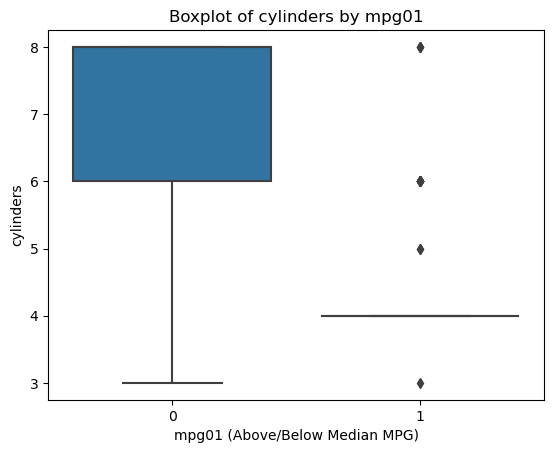

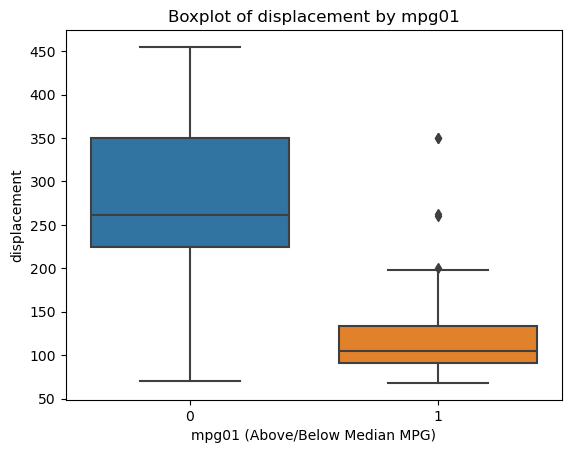

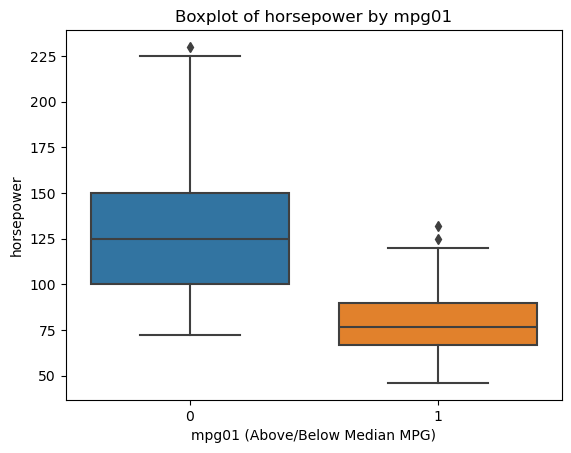

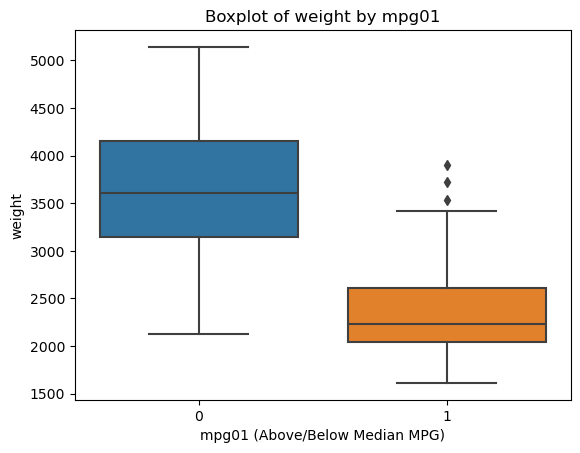

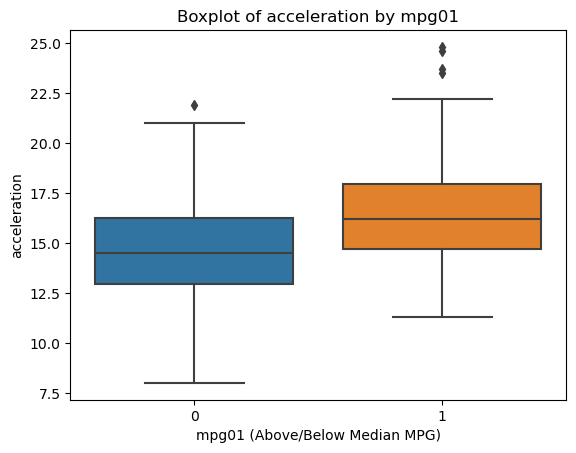

In [359]:
#b
vars = ['cylinders','displacement', 'horsepower', 'weight', 'acceleration']
for i in vars:
    sns.boxplot(x='mpg01', y=i, data=Auto)
    plt.title(f'Boxplot of {i} by mpg01')
    plt.xlabel('mpg01 (Above/Below Median MPG)')
    plt.ylabel(i)
    plt.show()

In [518]:
#c
#train&test
mpg01 = Auto.mpg01
Auto_df = Auto[['displacement', 'weight']]

(X_train,
 X_test,
 y_train,
 y_test) = train_test_split(Auto_df,
                            mpg01,
                            test_size=100,
                            random_state=0)

In [406]:
#d LDA
lda = LDA(store_covariance=True)
#LDA estimator automatically adds an intercept
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis(store_covariance=True)

In [407]:
lda_pred = lda.predict(X_test)
confusion_table(lda_pred, y_test)

Truth,0,1
Predicted,,
0,37,3
1,11,49


In [409]:
np.mean(lda_pred == y_test)# the test error is 0.14

0.86

In [410]:
#e QDA
qda = QDA(store_covariance=True)
qda.fit(X_train, y_train)

QuadraticDiscriminantAnalysis(store_covariance=True)

In [411]:
qda_pred = qda.predict(X_test)
confusion_table(qda_pred, y_test)

Truth,0,1
Predicted,,
0,39,7
1,9,45


In [413]:
np.mean(qda_pred == y_test)# the test error is 0.16

0.84

In [519]:
## logistic regression
X_test = sm.add_constant(X_test)
X_train = sm.add_constant(X_train)

In [520]:
## logistic regression
glm_train = sm.GLM(y_train, X_train, family=sm.families.Binomial())
results = glm_train.fit()
probs = results.predict(exog=X_test)
summarize(results)

,coef,std err,z,P>|z|
const,10.6069,1.592,6.662,0.000
displacement,-0.0169,0.006,-2.710,0.007
weight,-0.0027,0.001,-3.518,0.000


In [521]:
class_predictions = np.where(probs >= 0.5, 1, 0)

In [522]:
confusion_table(class_predictions, y_test)

Truth,0,1
Predicted,,
0,38,7
1,10,45


In [523]:
np.mean(class_predictions == y_test)# the test error is 0.16

0.83

In [524]:
X_train, X_test = [M.drop(columns=['const'])
                   for M in [X_train, X_test]]

In [428]:
# naive Bayes
NB = GaussianNB()
NB.fit(X_train, y_train)

GaussianNB()

In [429]:
NB_pred = NB.predict(X_test)
confusion_table(NB_pred, y_test)

Truth,0,1
Predicted,,
0,38,6
1,10,46


In [432]:
np.mean(NB_pred == y_test)#the test error is 0.16

0.84

In [445]:
#KNN
for K in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=K)
    knn_pred = knn.fit(X_train, y_train).predict(X_test)
    C = confusion_table(knn_pred, y_test)
    templ = ('K={0:d}: # predicted to be above median: {1:>2},' +
             ' # who did above median {2:d}, accuracy {3:.1%}, test error: {4:.1%}')
    pred = C.loc[1].sum()
    did_above = C.loc[1,1]
    
    test_error = 1 - np.mean(knn_pred == y_test)
    print(templ.format(
        K,
        pred,
        did_above,
        did_above / pred,
        test_error))

K=1: # predicted to be above median: 54, # who did above median 46, accuracy 85.2%, test error: 14.0%
K=2: # predicted to be above median: 47, # who did above median 43, accuracy 91.5%, test error: 13.0%
K=3: # predicted to be above median: 55, # who did above median 46, accuracy 83.6%, test error: 15.0%
K=4: # predicted to be above median: 50, # who did above median 44, accuracy 88.0%, test error: 14.0%
K=5: # predicted to be above median: 56, # who did above median 45, accuracy 80.4%, test error: 18.0%
K=6: # predicted to be above median: 53, # who did above median 44, accuracy 83.0%, test error: 17.0%
K=7: # predicted to be above median: 56, # who did above median 45, accuracy 80.4%, test error: 18.0%
K=8: # predicted to be above median: 55, # who did above median 44, accuracy 80.0%, test error: 19.0%
K=9: # predicted to be above median: 57, # who did above median 45, accuracy 78.9%, test error: 19.0%


In [443]:
###K=2

In [ ]:
###15.

In [447]:
#a
def Power():
    result = 2 ** 3  
    print(result)  

Power()

8


In [452]:
#b
def Power2(x, a):
    print(x**a) 
Power2(3, 8)

6561


In [453]:
Power2(10,3)

1000


In [454]:
Power2(8,17)

2251799813685248


In [455]:
Power2(131,3)

2248091


In [458]:
#d
def Power3(x, a):
    result = x**a
    return result 

<module 'matplotlib.pyplot' from '/opt/anaconda3/lib/python3.11/site-packages/matplotlib/pyplot.py'>

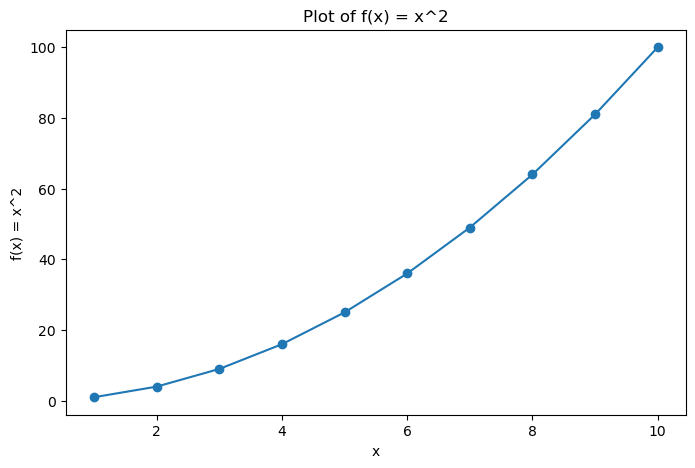

In [459]:
#e
x_values = np.arange(1, 11)
y_values = [Power3(x, 2) for x in x_values]
plt.figure(figsize=(8, 5))
plt.plot(x_values, y_values, marker='o') 

# Labeling the plot
plt.xlabel('x')
plt.ylabel('f(x) = x^2')
plt.title('Plot of f(x) = x^2')
plt

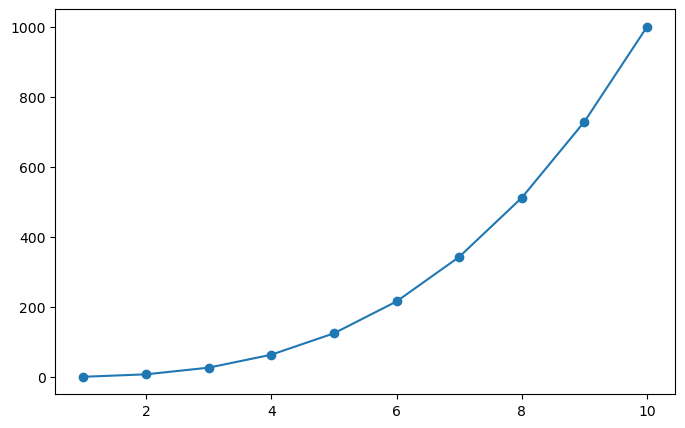

In [461]:
#f
def PlotPower(x_values,a):
    y_values = [x**a for x in x_values]
    plt.figure(figsize=(8, 5))
    plt.plot(x_values, y_values, marker='o')
PlotPower(np.arange(1, 11), 3)

In [469]:
#16.
Boston = load_data('Boston')
median_crim = Boston['crim'].median()
Boston['crim01'] = (Boston['crim'] > median_crim).astype(int)
Boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv,crim01
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,0
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,0
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4,0
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6,0
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9,0
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0,0


In [475]:
Boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv,crim01
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,0
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,0
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4,0
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6,0
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9,0
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0,0


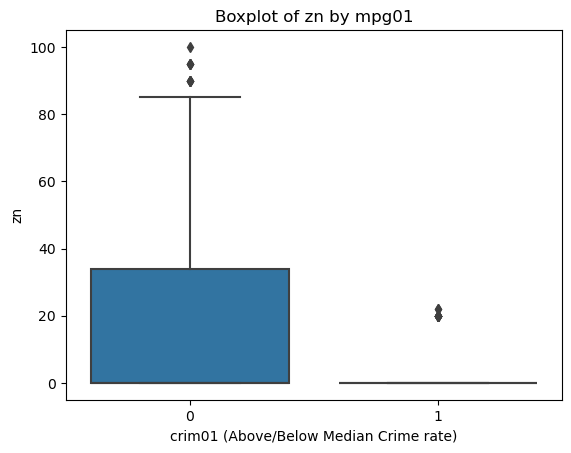

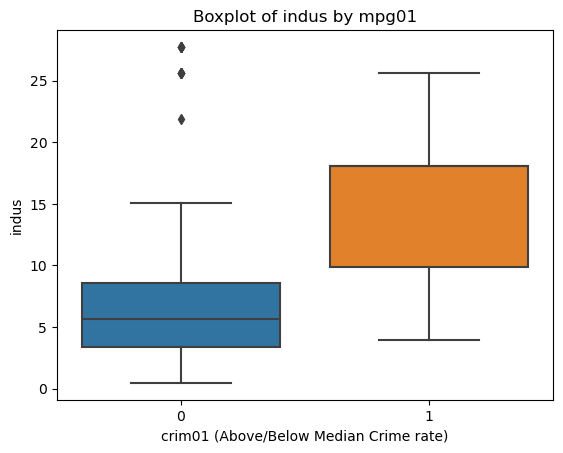

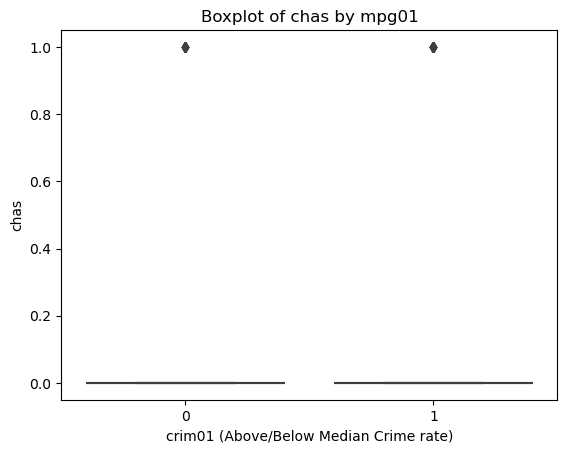

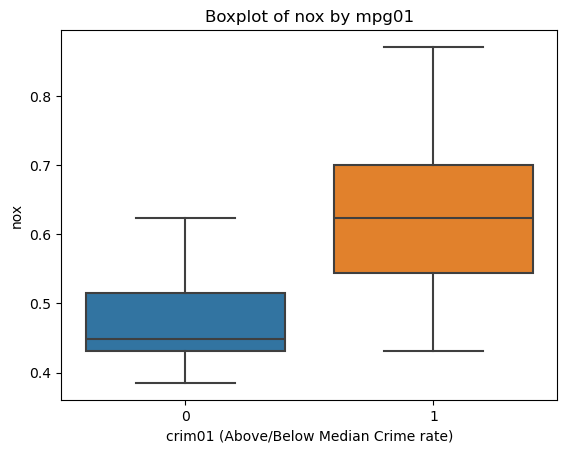

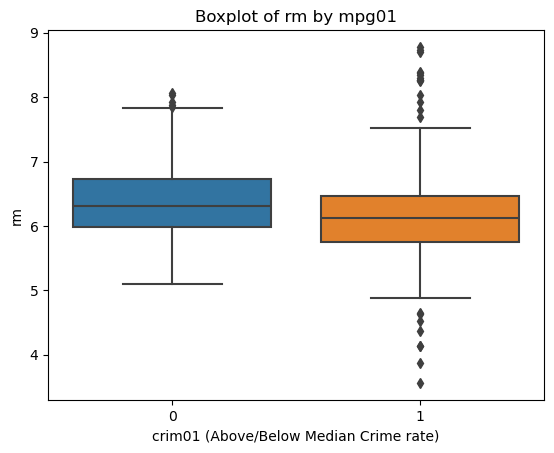

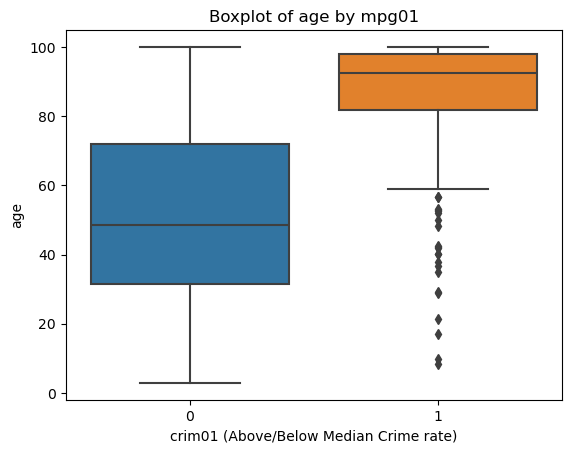

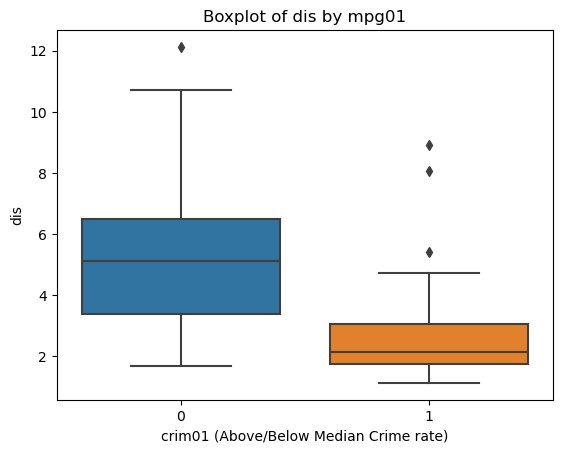

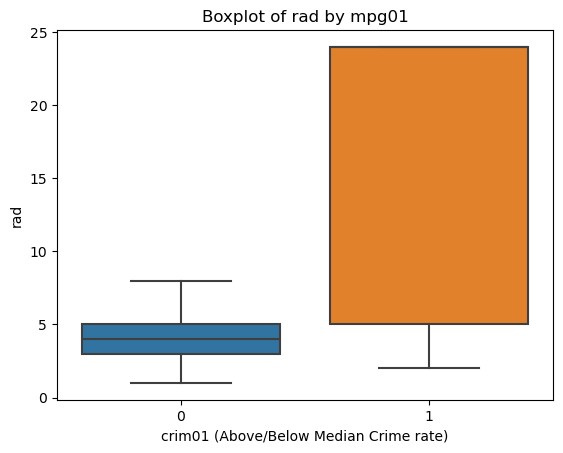

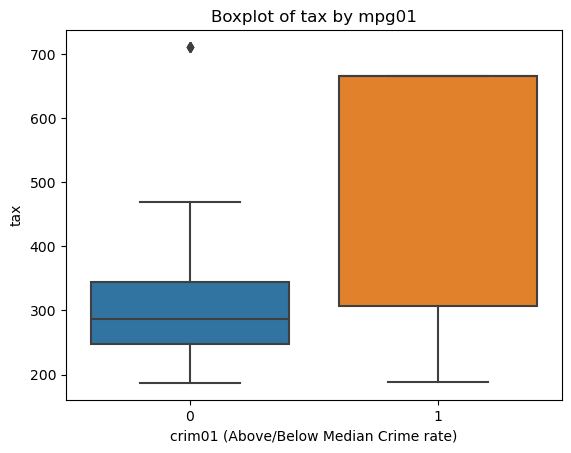

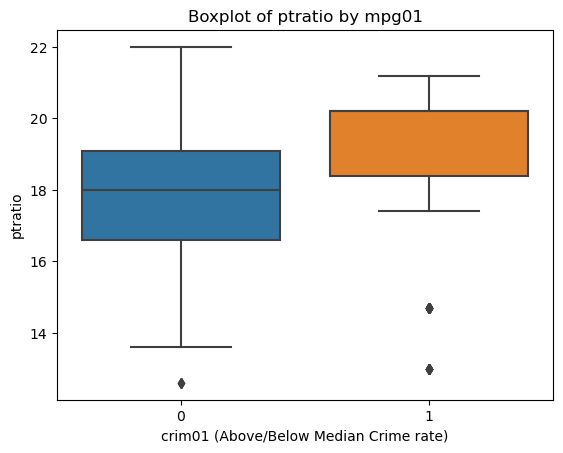

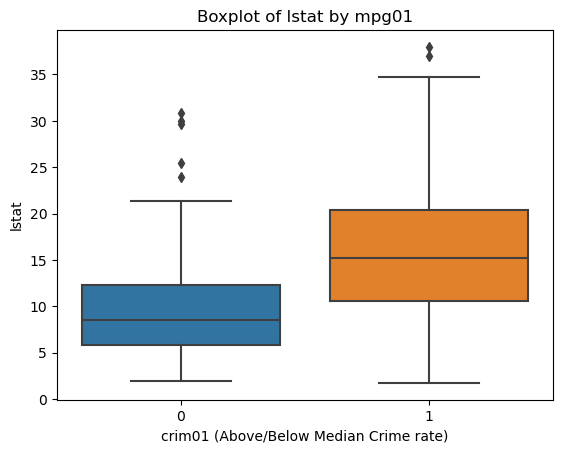

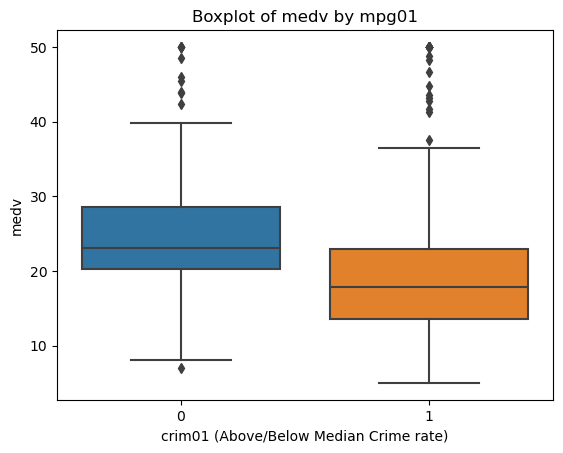

In [476]:
vars = Boston.loc[:, 'zn':'medv'].columns.tolist()
for i in vars:
    sns.boxplot(x='crim01', y=i, data=Boston)
    plt.title(f'Boxplot of {i} by mpg01')
    plt.xlabel('crim01 (Above/Below Median Crime rate)')
    plt.ylabel(i)
    plt.show()

In [ ]:
#indus,nox,age,dis,rad

In [508]:
crim01 = Boston.crim01
Boston_df = Boston[['indus', 'nox','age' ,'dis','rad']]

(X_train,
 X_test,
 y_train,
 y_test) = train_test_split(Boston_df,
                            crim01,
                            test_size=200,
                            random_state=0)

In [ ]:
#logistic regression

In [509]:
X_test = sm.add_constant(X_test)
X_train = sm.add_constant(X_train)

In [510]:
glm_train = sm.GLM(y_train, X_train, family=sm.families.Binomial())
results = glm_train.fit()
probs = results.predict(exog=X_test)
summarize(results)

,coef,std err,z,P>|z|
const,-23.4174,4.563,-5.132,0.000
indus,-0.1174,0.050,-2.358,0.018
nox,37.0293,8.237,4.496,0.000
age,0.0251,0.012,2.073,0.038
dis,0.2525,0.188,1.339,0.180
rad,0.3603,0.119,3.015,0.003


In [511]:
class_predictions = np.where(probs >= 0.5, 1, 0)
confusion_table(class_predictions, y_test)

Truth,0,1
Predicted,,
0,90,12
1,10,88


In [490]:
np.mean(class_predictions == y_test)

0.89

In [512]:
#LDA
lda = LDA(store_covariance=True)
#LDA estimator automatically adds an intercept
X_train, X_test = [M.drop(columns=['const'])
                   for M in [X_train, X_test]]
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis(store_covariance=True)

In [513]:
lda_pred = lda.predict(X_test)
confusion_table(lda_pred, y_test)

Truth,0,1
Predicted,,
0,93,24
1,7,76


In [514]:
np.mean(lda_pred == y_test)

0.845

In [515]:
#naive Bayes
NB = GaussianNB()
NB.fit(X_train, y_train)
NB_pred = NB.predict(X_test)
confusion_table(NB_pred, y_test)

Truth,0,1
Predicted,,
0,90,22
1,10,78


In [516]:
np.mean(NB_pred == y_test)

0.84

In [517]:
#KNN models
for K in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=K)
    knn_pred = knn.fit(X_train, y_train).predict(X_test)
    C = confusion_table(knn_pred, y_test)
    templ = ('K={0:d}: # predicted to be above median: {1:>2},' +
             ' # who did above median {2:d}, accuracy {3:.1%}, test error: {4:.1%}')
    pred = C.loc[1].sum()
    did_above = C.loc[1,1]
    
    test_error = 1 - np.mean(knn_pred == y_test)
    print(templ.format(
        K,
        pred,
        did_above,
        did_above / pred,
        test_error))

K=1: # predicted to be above median: 102, # who did above median 86, accuracy 84.3%, test error: 15.0%
K=2: # predicted to be above median: 85, # who did above median 80, accuracy 94.1%, test error: 12.5%
K=3: # predicted to be above median: 100, # who did above median 86, accuracy 86.0%, test error: 14.0%
K=4: # predicted to be above median: 89, # who did above median 81, accuracy 91.0%, test error: 13.5%
K=5: # predicted to be above median: 101, # who did above median 83, accuracy 82.2%, test error: 17.5%
K=6: # predicted to be above median: 93, # who did above median 79, accuracy 84.9%, test error: 17.5%
K=7: # predicted to be above median: 101, # who did above median 81, accuracy 80.2%, test error: 19.5%
K=8: # predicted to be above median: 93, # who did above median 78, accuracy 83.9%, test error: 18.5%
K=9: # predicted to be above median: 101, # who did above median 80, accuracy 79.2%, test error: 20.5%


In [ ]:
#K = 2

In [ ]:
###############labs

In [13]:
#Smarket.corr()
#The pandas library does not report a correlation for the Direction variable because it is qualitative.

In [23]:
Smarket_1 = Smarket.iloc[:, :8]
Smarket_1.corr()
#the correlations between the lagged return variables and today’s return are close to zero

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,0.029700,0.030596,0.033195,0.035689,0.029788,0.539006,0.030095
Lag1,0.029700,1.000000,-0.026294,-0.010803,-0.002986,-0.005675,0.040910,-0.026155
Lag2,0.030596,-0.026294,1.000000,-0.025897,-0.010854,-0.003558,-0.043383,-0.010250
Lag3,0.033195,-0.010803,-0.025897,1.000000,-0.024051,-0.018808,-0.041824,-0.002448
Lag4,0.035689,-0.002986,-0.010854,-0.024051,1.000000,-0.027084,-0.048414,-0.006900
Lag5,0.029788,-0.005675,-0.003558,-0.018808,-0.027084,1.000000,-0.022002,-0.034860
Volume,0.539006,0.040910,-0.043383,-0.041824,-0.048414,-0.022002,1.000000,0.014592
Today,0.030095,-0.026155,-0.010250,-0.002448,-0.006900,-0.034860,0.014592,1.000000


<Axes: >

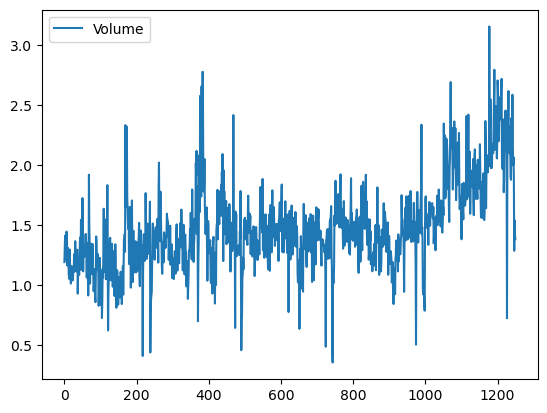

In [14]:
Smarket.plot(y='Volume')

In [162]:
# Logistic Regression
#predict regression using Lag1 through Lag5 and Volume
#sm.GLM() function fts generalized linear models, a class of models that includes logistic regression.
# pass in the argument family=sm.families.Binomial() in order to tell statsmodels to run a logistic regression
allvars = Smarket.columns.drop(['Today', 'Direction', 'Year'])
design = MS(allvars)
X = design.fit_transform(Smarket)
y = Smarket.Direction == 'Up'
glm = sm.GLM(y, X, family=sm.families.Binomial())
results = glm.fit()
summarize(results)

#p-value is still relatively large, and so there is no clear evidence of a real association between Lag1 and Direction.

,coef,std err,z,P>|z|
intercept,-0.1260,0.241,-0.523,0.601
Lag1,-0.0731,0.050,-1.457,0.145
Lag2,-0.0423,0.050,-0.845,0.398
Lag3,0.0111,0.050,0.222,0.824
Lag4,0.0094,0.050,0.187,0.851
Lag5,0.0103,0.050,0.208,0.835
Volume,0.1354,0.158,0.855,0.392


In [384]:
#sm.Logit() fts a logistic regression model directly
allvars = Smarket.columns.drop(['Today', 'Direction', 'Year'])
design = MS(allvars)
X = design.fit_transform(Smarket)
y = Smarket.Direction == 'Up'
glm = sm.Logit(y, X)
results = glm.fit()
summarize(results)

Optimization terminated successfully.
         Current function value: 0.691034
         Iterations 4


,coef,std err,z,P>|z|
intercept,-0.1260,0.241,-0.523,0.601
Lag1,-0.0731,0.050,-1.457,0.145
Lag2,-0.0423,0.050,-0.845,0.398
Lag3,0.0111,0.050,0.222,0.824
Lag4,0.0094,0.050,0.187,0.851
Lag5,0.0103,0.050,0.208,0.835
Volume,0.1354,0.158,0.855,0.392


In [385]:
X

,intercept,Lag1,Lag2,Lag3,Lag4,Lag5,Volume
0,1.0,0.381,-0.192,-2.624,-1.055,5.010,1.19130
1,1.0,0.959,0.381,-0.192,-2.624,-1.055,1.29650
2,1.0,1.032,0.959,0.381,-0.192,-2.624,1.41120
3,1.0,-0.623,1.032,0.959,0.381,-0.192,1.27600
4,1.0,0.614,-0.623,1.032,0.959,0.381,1.20570
...,...,...,...,...,...,...,...
1245,1.0,0.422,0.252,-0.024,-0.584,-0.285,1.88850
1246,1.0,0.043,0.422,0.252,-0.024,-0.584,1.28581
1247,1.0,-0.955,0.043,0.422,0.252,-0.024,1.54047
1248,1.0,0.130,-0.955,0.043,0.422,0.252,1.42236


In [386]:
y

0        True
1        True
2       False
3        True
4        True
        ...  
1245     True
1246    False
1247     True
1248    False
1249    False
Name: Direction, Length: 1250, dtype: bool

In [164]:
results.params
results.pvalues

intercept    0.600700
Lag1         0.145232
Lag2         0.398352
Lag3         0.824334
Lag4         0.851445
Lag5         0.834998
Volume       0.392404
dtype: float64

In [165]:
#predict() method of results can be used to predict the probability that the market will go up
#If no data set is supplied to the predict() function, then the probabilities are computed for the training data that was used to ft the logistic regression model.
probs = results.predict()
probs[:10]

array([0.50708413, 0.48146788, 0.48113883, 0.51522236, 0.51078116,
       0.50695646, 0.49265087, 0.50922916, 0.51761353, 0.48883778])

In [166]:
#convert these predicted probabilities into class labels
labels = np.array(['Down']*1250)
labels[probs >0.5] = "Up"

In [167]:
#summerize the prediction use confusion_table()
confusion_table(labels, Smarket.Direction)

Truth,Down,Up
Predicted,,
Down,145,141
Up,457,507


In [56]:
#np.mean() function can be used to compute the fraction of days for which the prediction was correct
(507+145)/1250, np.mean(labels == Smarket.Direction)

(0.5216, 0.5216)

In [388]:
train = (Smarket.Year < 2005)
Smarket_train = Smarket.loc[train]
Smarket_test = Smarket.loc[~train]
Smarket_test.shape

(252, 9)

In [389]:
# fit a logistic regression model using only the subset of the observations that correspond to dates before 2005
# testing was performed using only the dates in 2005
X_train, X_test = X.loc[train], X.loc[~train]
y_train, y_test = y.loc[train], y.loc[~train]
glm_train = sm.GLM(y_train, X_train, family=sm.families.Binomial())
results = glm_train.fit()
probs = results.predict(exog=X_test)

In [170]:
D = Smarket.Direction
L_train, L_test = D.loc[train], D.loc[~train]

In [171]:
labels = np.array(['Down']*252)
labels[probs >0.5] = "Up"
confusion_table(labels, L_test)

Truth,Down,Up
Predicted,,
Down,77,97
Up,34,44


In [71]:
np.mean(labels == L_test)
#the test error !=rate is 52%, which is worse than random guessing

0.4801587301587302

In [ ]:
#Perhaps by removing the variables that appear not to be helpful in predicting Direction, 
#we can obtain a more effective model.

In [392]:
#using just Lag1 and Lag2, which seemed to have the highest predictive power(lowest p-value)
model = MS(['Lag1','Lag2']).fit(Smarket)
X = model.transform(Smarket)
y = Smarket.Direction == 'Up'
X_train, X_test = X.loc[train], X.loc[~train]
y_train, y_test = y.loc[train], y.loc[~train]
glm_train = sm.GLM(y_train, X_train, family=sm.families.Binomial())
results = glm_train.fit()
probs = results.predict(exog=X_test)
summarize(results)

,coef,std err,z,P>|z|
intercept,0.0322,0.063,0.508,0.611
Lag1,-0.0556,0.052,-1.076,0.282
Lag2,-0.0445,0.052,-0.861,0.389


In [173]:
labels = np.array(['Down']*252)
labels[probs >0.5] = "Up"
confusion_table(labels, L_test)

Truth,Down,Up
Predicted,,
Down,35,35
Up,76,106


In [174]:
np.mean(labels == L_test)
# 56% of the daily movements have been correctly predicted

0.5595238095238095

In [175]:
#want to predict Direction on a day when Lag1 and Lag2 equal 1.2 and 1.1, respectively, 
#and on a day when they equal 1.5 and −0.8. 
newdata = pd.DataFrame({'Lag1':[1.2, 1.5],'Lag2':[1.1, -0.8]})
newX = model.transform(newdata)
results.predict(newX)

0    0.479146
1    0.496094
dtype: float64

In [ ]:
#less direct approach to estimating these probabilities

In [176]:
##############LDA
#using the function LinearDiscriminantAnalysis(), which we have abbreviated LDA()
lda = LDA(store_covariance=True)


In [177]:
#LDA estimator automatically adds an intercept
X_train, X_test = [M.drop(columns=['intercept'])
                   for M in [X_train, X_test]]
lda.fit(X_train, L_train)

LinearDiscriminantAnalysis(store_covariance=True)

In [178]:
lda.means_
# extract the means in the two classes with the means_ attribute.

array([[ 0.04279022,  0.03389409],
       [-0.03954635, -0.03132544]])

In [117]:
# estimated prior probabilities are stored in the priors_ attribute
lda.classes_

array(['Down', 'Up'], dtype='<U4')

In [119]:
lda.priors_
#prior probabilitie: πˆDown = 0.492 and πˆUp = 0.508.

array([0.49198397, 0.50801603])

In [120]:
# linear discriminant vectors, #coefficients
lda.scalings_

array([[-0.64201904],
       [-0.51352928]])

In [190]:
#In other words, these are the multipliers of the elements of X = x in (4.24). If −0.64 × Lag1 − 0.51 × Lag2 is large,
#then the LDA classifer will predict a market increase
lda_pred = lda.predict(X_test)

In [180]:
confusion_table(lda_pred, L_test)
#increase is what we are trying to detect(positive)

Truth,Down,Up
Predicted,,
Down,35,35
Up,76,106


In [191]:
np.mean(lda_pred == L_test)

0.5595238095238095

In [181]:
#Applying a 50% threshold to the posterior probabilities of being in class one allows us to 
#recreate the predictions contained in lda_pred
lda_prob = lda.predict_proba(X_test)
np.all(
    np.where(lda_prob[:,1] >= 0.5, 'Up','Down') == lda_pred
)

True

In [182]:
#used the np.where() function that creates an array with value 'Up' for indices where the second column of lda_prob
#(the estimated posterior probability of 'Up')  is greater than 0.5
#For problems with more than two classes the labels are chosen as the class whose posterior probability is highest:
np.all(
[lda.classes_[i] for i in np.argmax(lda_prob, 1)] ==
lda_pred
)

True

In [183]:
#if the posterior probability is at least 90%(
np.sum(lda_prob[:,0] > 0.9)
#No days in 2005 meet that threshold

0

In [184]:
#########QDA
#now fit a QDA model to the Smarket data
qda = QDA(store_covariance=True)
qda.fit(X_train, L_train)

QuadraticDiscriminantAnalysis(store_covariance=True)

In [185]:
qda.means_, qda.priors_

(array([[ 0.04279022,  0.03389409],
        [-0.03954635, -0.03132544]]),
 array([0.49198397, 0.50801603]))

In [186]:
#QDA() classifer will estimate one covariance per class
qda.covariance_[0]#for first class

array([[ 1.50662277, -0.03924806],
       [-0.03924806,  1.53559498]])

In [188]:
qda_pred = qda.predict(X_test)
confusion_table(qda_pred, L_test)

Truth,Down,Up
Predicted,,
Down,30,20
Up,81,121


In [193]:
np.mean(qda_pred == L_test)
#quadratic form assumed by QDA may capture the true relationship more accurately than the linear forms assumed by LDA and logistic regression
# on a larger test set

0.5992063492063492

In [194]:
# fit a naive Bayes model to the Smarket data
NB = GaussianNB()
NB.fit(X_train, L_train)

GaussianNB()

In [197]:
NB.classes_

array(['Down', 'Up'], dtype='<U4')

In [199]:
NB.class_prior_
#class prior probabilities

array([0.49198397, 0.50801603])

In [201]:
NB.theta_
#The number of rows is equal to the number of classes, 
#while the number of columns is equal to the number of features

array([[ 0.04279022,  0.03389409],
       [-0.03954635, -0.03132544]])

In [202]:
NB.var_

array([[1.50355429, 1.53246749],
       [1.51401364, 1.48732877]])

In [204]:
X_train[L_train == 'Down'].mean()

Lag1    0.042790
Lag2    0.033894
dtype: float64

In [205]:
X_train[L_train == 'Down'].var(ddof=0)

Lag1    1.503554
Lag2    1.532467
dtype: float64

In [196]:
NB_pred = NB.predict(X_test)
confusion_table(NB_pred, L_test)

Truth,Down,Up
Predicted,,
Down,29,20
Up,82,121


In [207]:
np.mean(NB_pred == L_test)#better than LDA, but a little worse than QDA

0.5952380952380952

In [208]:
NB.predict_proba(X_test)[:5]

array([[0.4873288 , 0.5126712 ],
       [0.47623584, 0.52376416],
       [0.46529531, 0.53470469],
       [0.47484469, 0.52515531],
       [0.49020587, 0.50979413]])

In [209]:
#perform KNN
#K = 1
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_train, L_train)
knn1_pred = knn1.predict(X_test)
confusion_table(knn1_pred, L_test)

Truth,Down,Up
Predicted,,
Down,43,58
Up,68,83


In [211]:
np.mean(knn1_pred == L_test)# not very good

0.5

In [213]:
#K = 3
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(X_train, L_train)
knn3_pred = knn3.predict(X_test)
confusion_table(knn3_pred, L_test)

Truth,Down,Up
Predicted,,
Down,48,55
Up,63,86


In [214]:
np.mean(knn3_pred == L_test)

0.5317460317460317

In [215]:
#KNN does not perform well on the Smarket data, but it often does provide impressive results
Caravan = load_data('Caravan')
Purchase = Caravan.Purchase
Purchase.value_counts()

Purchase
No     5474
Yes     348
Name: count, dtype: int64

In [216]:
feature_df = Caravan.drop(columns=['Purchase'])

In [ ]:
#Any variables that are on a large scale will have a much larger efect on the distance between the observations
#than variables that are on a small scale
#so standardize the data

In [221]:
#standardize the data so that all variables are given a mean of zero and a standard deviation of one
scaler = StandardScaler(with_mean=True,#with_mean indicates whether or not we should subtract the mean
                        with_std=True,#with_std indicates whether or not we should scale the columns to have standard deviation of 1 or not
                        copy=True)

In [ ]:
#first line below, the parameters for the scaling are computed and stored in scaler
# the second line actually constructs the standardized set of features

In [218]:
scaler.fit(feature_df)
X_std = scaler.transform(feature_df)

In [219]:
feature_std = pd.DataFrame(
X_std,
columns=feature_df.columns);
feature_std.std()

MOSTYPE     1.000086
MAANTHUI    1.000086
MGEMOMV     1.000086
MGEMLEEF    1.000086
MOSHOOFD    1.000086
              ...   
AZEILPL     1.000086
APLEZIER    1.000086
AFIETS      1.000086
AINBOED     1.000086
ABYSTAND    1.000086
Length: 85, dtype: float64

In [224]:
feature_std.mean()

MOSTYPE    -7.749822e-17
MAANTHUI   -1.614038e-16
MGEMOMV    -2.099164e-16
MGEMLEEF    2.154084e-16
MOSHOOFD   -2.929067e-17
                ...     
AZEILPL    -6.102222e-19
APLEZIER   -1.830667e-18
AFIETS      0.000000e+00
AINBOED     3.905422e-17
ABYSTAND    3.356222e-18
Length: 85, dtype: float64

In [227]:
#split the observations into a test set, containing 1000 observations
#random_state=0 ensures that we get the same split each time we rerun the code
(X_train,
 X_test,
 y_train,
 y_test) = train_test_split(feature_std,
                            Purchase,
                            test_size=1000,
                            random_state=0)

In [228]:
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_train, y_train)
knn1_pred = knn1.predict(X_test)
confusion_table(knn1_pred, y_test)

Truth,No,Yes
Predicted,,
No,880,58
Yes,53,9


In [233]:
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1_pred = knn1.fit(X_train, y_train).predict(X_test)
np.mean(y_test != knn1_pred), np.mean(y_test != "No")#(53+58),(58+9)y_test is about the TRUTH

(0.111, 0.067)

In [ ]:
# Among 62 such customers, 9, or 14.5%, actually do purchase insurance

In [234]:
#Tuning Parameters
for K in range(1,6):
    knn = KNeighborsClassifier(n_neighbors=K)
    knn_pred = knn.fit(X_train, y_train).predict(X_test)
    C = confusion_table(knn_pred, y_test)
    templ = ('K={0:d}: # predicted to rent: {1:>2},' +
             ' # who did rent {2:d}, accuracy {3:.1%}')
    pred = C.loc['Yes'].sum()
    did_rent = C.loc['Yes','Yes']
    print(templ.format(
        K,
        pred,
        did_rent,
        did_rent / pred))

K=1: # predicted to rent: 62, # who did rent 9, accuracy 14.5%
K=2: # predicted to rent:  6, # who did rent 1, accuracy 16.7%
K=3: # predicted to rent: 20, # who did rent 3, accuracy 15.0%
K=4: # predicted to rent:  4, # who did rent 0, accuracy 0.0%
K=5: # predicted to rent:  7, # who did rent 1, accuracy 14.3%


In [238]:
logit = LogisticRegression(C=1e10, solver='liblinear')
logit.fit(X_train, y_train)
logit_pred = logit.predict_proba(X_test)
logit_labels = np.where(logit_pred[:,1] > 0.5, 'Yes', 'No')
confusion_table(logit_labels, y_test)

Truth,No,Yes
Predicted,,
No,931,67
Yes,2,0


In [244]:
#logit_pred[:,1] all rows, col 1(2rd col)

In [ ]:
#solver='liblinear' above to avoid a warning with the default solver 
#which would indicate that the algorithm does not converge.

In [236]:
logit_labels = np.where(logit_pred[:,1]>0.25, 'Yes', 'No')
confusion_table(logit_labels, y_test)

Truth,No,Yes
Predicted,,
No,913,58
Yes,20,9


In [245]:
Bike = load_data('Bikeshare')

In [246]:
Bike.shape, Bike.columns

((8645, 15),
 Index(['season', 'mnth', 'day', 'hr', 'holiday', 'weekday', 'workingday',
        'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
        'registered', 'bikers'],
       dtype='object'))

In [248]:
X = MS(['mnth',
        'hr',
        'workingday',
        'temp',
        'weathersit']).fit_transform(Bike)
Y = Bike['bikers']
M_lm = sm.OLS(Y, X).fit()
summarize(M_lm)

,coef,std err,t,P>|t|
intercept,-68.6317,5.307,-12.932,0.000
mnth[Feb],6.8452,4.287,1.597,0.110
mnth[March],16.5514,4.301,3.848,0.000
mnth[April],41.4249,4.972,8.331,0.000
mnth[May],72.5571,5.641,12.862,0.000
mnth[June],67.8187,6.544,10.364,0.000
mnth[July],45.3245,7.081,6.401,0.000
mnth[Aug],53.2430,6.640,8.019,0.000
mnth[Sept],66.6783,5.925,11.254,0.000
mnth[Oct],75.8343,4.950,15.319,0.000


In [ ]:
#24 levels in hr and 40 rows in all

In [249]:
hr_encode = contrast('hr', 'sum')
mnth_encode = contrast('mnth', 'sum')

In [251]:
X2 = MS([mnth_encode,
         hr_encode,
         'workingday',
         'temp',
         'weathersit']).fit_transform(Bike)
M2_lm = sm.OLS(Y, X2).fit()
S2 = summarize(M2_lm)
S2#the coefcients of hr and mnth in M2_lm will always sum to zero,

,coef,std err,t,P>|t|
intercept,73.5974,5.132,14.340,0.000
mnth[Jan],-46.0871,4.085,-11.281,0.000
mnth[Feb],-39.2419,3.539,-11.088,0.000
mnth[March],-29.5357,3.155,-9.361,0.000
mnth[April],-4.6622,2.741,-1.701,0.089
mnth[May],26.4700,2.851,9.285,0.000
mnth[June],21.7317,3.465,6.272,0.000
mnth[July],-0.7626,3.908,-0.195,0.845
mnth[Aug],7.1560,3.535,2.024,0.043
mnth[Sept],20.5912,3.046,6.761,0.000


In [ ]:
#the (unreported) coefcient estimate for the last level of mnth is not zero: 
#instead, it equals the negative of the sum of the coefcient estimates for all of the other levels.

In [252]:
# the choice of coding really does not matter
np.sum((M_lm.fittedvalues - M2_lm.fittedvalues)**2)#the predictions from the linear model are the same regardless of coding:

1.0341283435713732e-18

In [254]:
np.allclose(M_lm.fittedvalues , M2_lm.fittedvalues)#The sum of squared diferences is zero

True

In [255]:
coef_month = S2[S2.index.str.contains('mnth')]['coef']
coef_month

mnth[Jan]     -46.0871
mnth[Feb]     -39.2419
mnth[March]   -29.5357
mnth[April]    -4.6622
mnth[May]      26.4700
mnth[June]     21.7317
mnth[July]     -0.7626
mnth[Aug]       7.1560
mnth[Sept]     20.5912
mnth[Oct]      29.7472
mnth[Nov]      14.2229
Name: coef, dtype: float64

In [256]:
#append Dec as the negative of the sum of all other months
months = Bike['mnth'].dtype.categories
coef_month = pd.concat([
    coef_month,
    pd.Series([-coef_month.sum()],
              index=['mnth[Dec]'
                    ])
])
coef_month

mnth[Jan]     -46.0871
mnth[Feb]     -39.2419
mnth[March]   -29.5357
mnth[April]    -4.6622
mnth[May]      26.4700
mnth[June]     21.7317
mnth[July]     -0.7626
mnth[Aug]       7.1560
mnth[Sept]     20.5912
mnth[Oct]      29.7472
mnth[Nov]      14.2229
mnth[Dec]       0.3705
dtype: float64

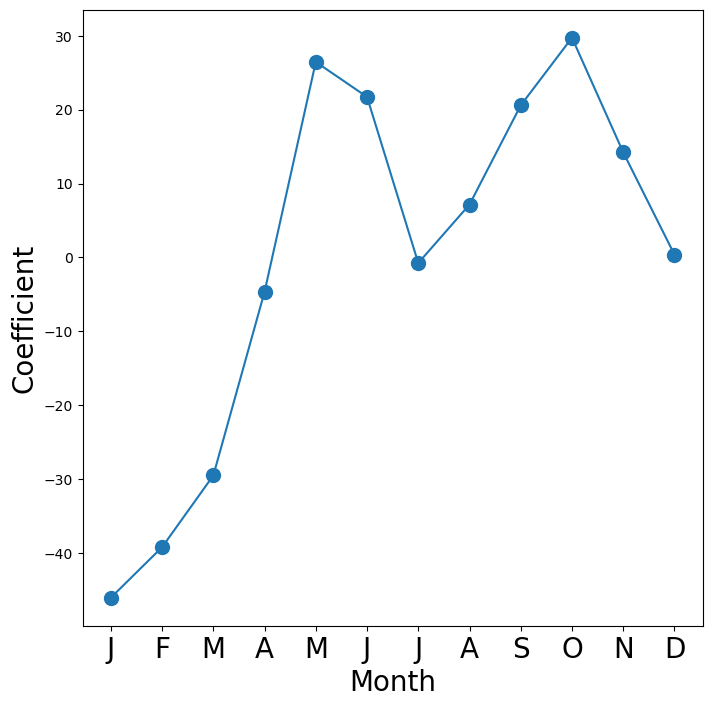

In [257]:
fig_month, ax_month = subplots(figsize=(8,8))
x_month = np.arange(coef_month.shape[0])
ax_month.plot(x_month, coef_month, marker='o', ms=10)
ax_month.set_xticks(x_month)
ax_month.set_xticklabels([l[5] for l in coef_month.index], fontsize
=20)
ax_month.set_xlabel('Month', fontsize=20)
ax_month.set_ylabel('Coefficient', fontsize=20);

In [259]:
coef_hr = S2[S2.index.str.contains('hr')]['coef']
coef_hr = coef_hr.reindex(['hr[{0}]'.format(h) for h in range(23)])
coef_hr = pd.concat([coef_hr,
                     pd.Series([-coef_hr.sum()], index=['hr[23]'])
                    ])

Text(0, 0.5, 'Coefficient')

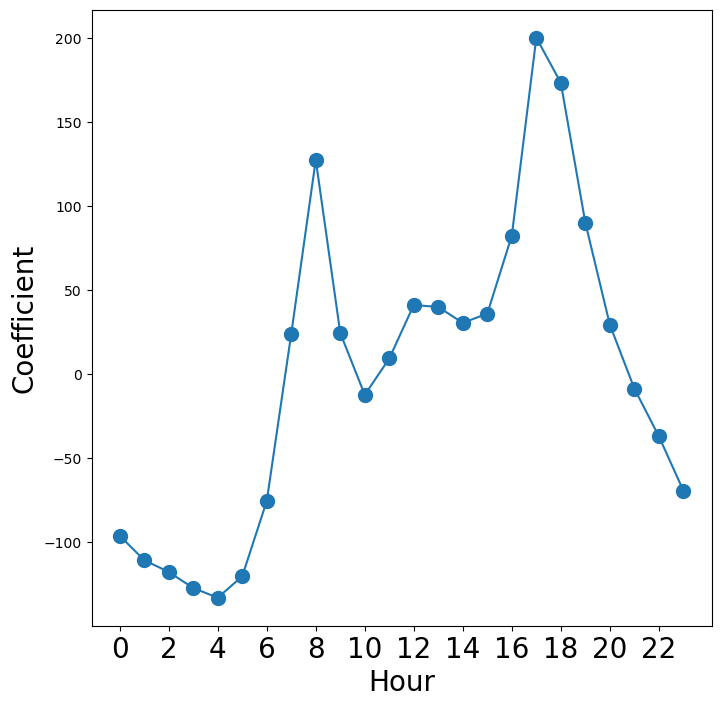

In [260]:
fig_hr, ax_hr = subplots(figsize=(8,8))
x_hr = np.arange(coef_hr.shape[0])
ax_hr.plot(x_hr, coef_hr, marker='o', ms=10)
ax_hr.set_xticks(x_hr[::2])
ax_hr.set_xticklabels(range(24)[::2], fontsize=20)
ax_hr.set_xlabel('Hour', fontsize=20)
ax_hr.set_ylabel('Coefficient', fontsize=20)

In [261]:
#sm.GLM() with the Poisson family specifed
M_pois = sm.GLM(Y, X2, family=sm.families.Poisson()).fit()

In [262]:
S_pois = summarize(M_pois)
coef_month = S_pois[S_pois.index.str.contains('mnth')]['coef']
coef_month = pd.concat([coef_month,
pd.Series([-coef_month.sum()],
index=['mnth[Dec]'])])
coef_hr = S_pois[S_pois.index.str.contains('hr')]['coef']
coef_hr = pd.concat([coef_hr,
pd.Series([-coef_hr.sum()],
index=['hr[23]'])])

/var/folders/4t/w05mrsdn0r9d85szm0g3kg740000gn/T/ipykernel_4850/2056424977.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_hr.set_xticklabels(range(24)[::2], fontsize=20)


Text(0, 0.5, 'Coefficient')

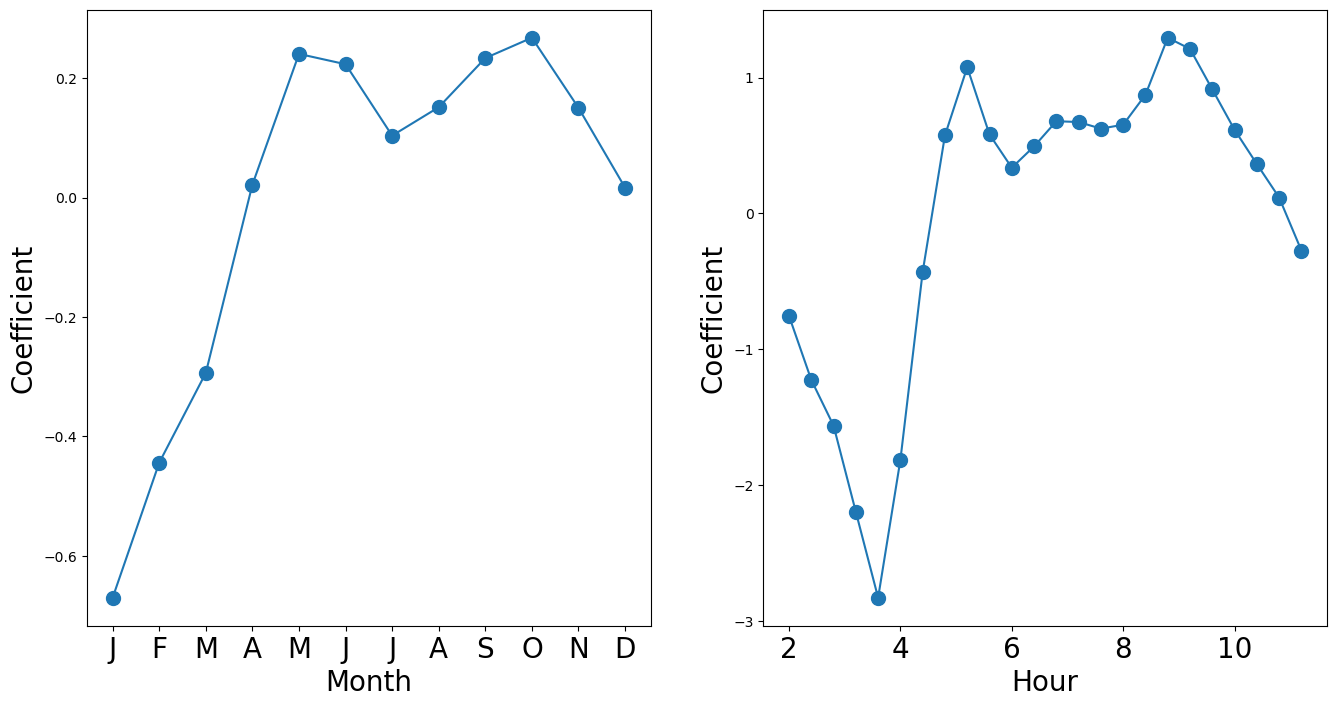

In [263]:
fig_pois, (ax_month, ax_hr) = subplots(1, 2, figsize=(16,8))
ax_month.plot(x_month, coef_month, marker='o', ms=10)
ax_month.set_xticks(x_month)
ax_month.set_xticklabels([l[5] for l in coef_month.index], fontsize
=20)
ax_month.set_xlabel('Month', fontsize=20)
ax_month.set_ylabel('Coefficient', fontsize=20)
ax_hr.plot(x_hr, coef_hr, marker='o', ms=10)
ax_hr.set_xticklabels(range(24)[::2], fontsize=20)
ax_hr.set_xlabel('Hour', fontsize=20)
ax_hr.set_ylabel('Coefficient', fontsize=20)

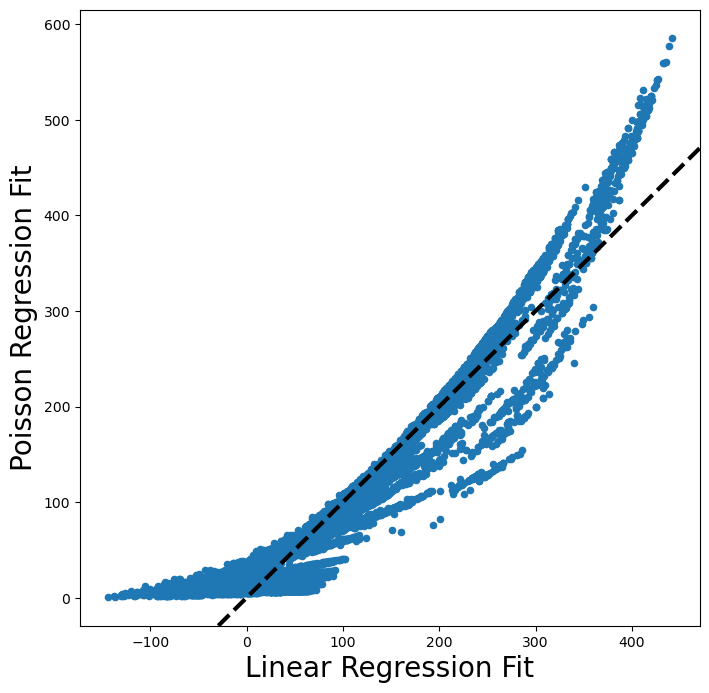

In [264]:
fig, ax = subplots(figsize=(8, 8))
ax.scatter(M2_lm.fittedvalues ,
M_pois.fittedvalues,
s=20)
ax.set_xlabel('Linear Regression Fit', fontsize=20)
ax.set_ylabel('Poisson Regression Fit', fontsize=20)
ax.axline([0,0], c='black', linewidth=3,
linestyle='--', slope=1)